In [1]:
import yaml
import os
from os.path import join
import matplotlib.pyplot as plt
import numpy as np
from data_bank import data_selector
import tensorflow as tf

 Existing data

Images : data/shades_data/t0_images
Labels : data/shades_data/t0_labels
Difference: data/shades_data/t0_diff
Model Number: 1.000000


(30, 224, 224)
(30, 1)


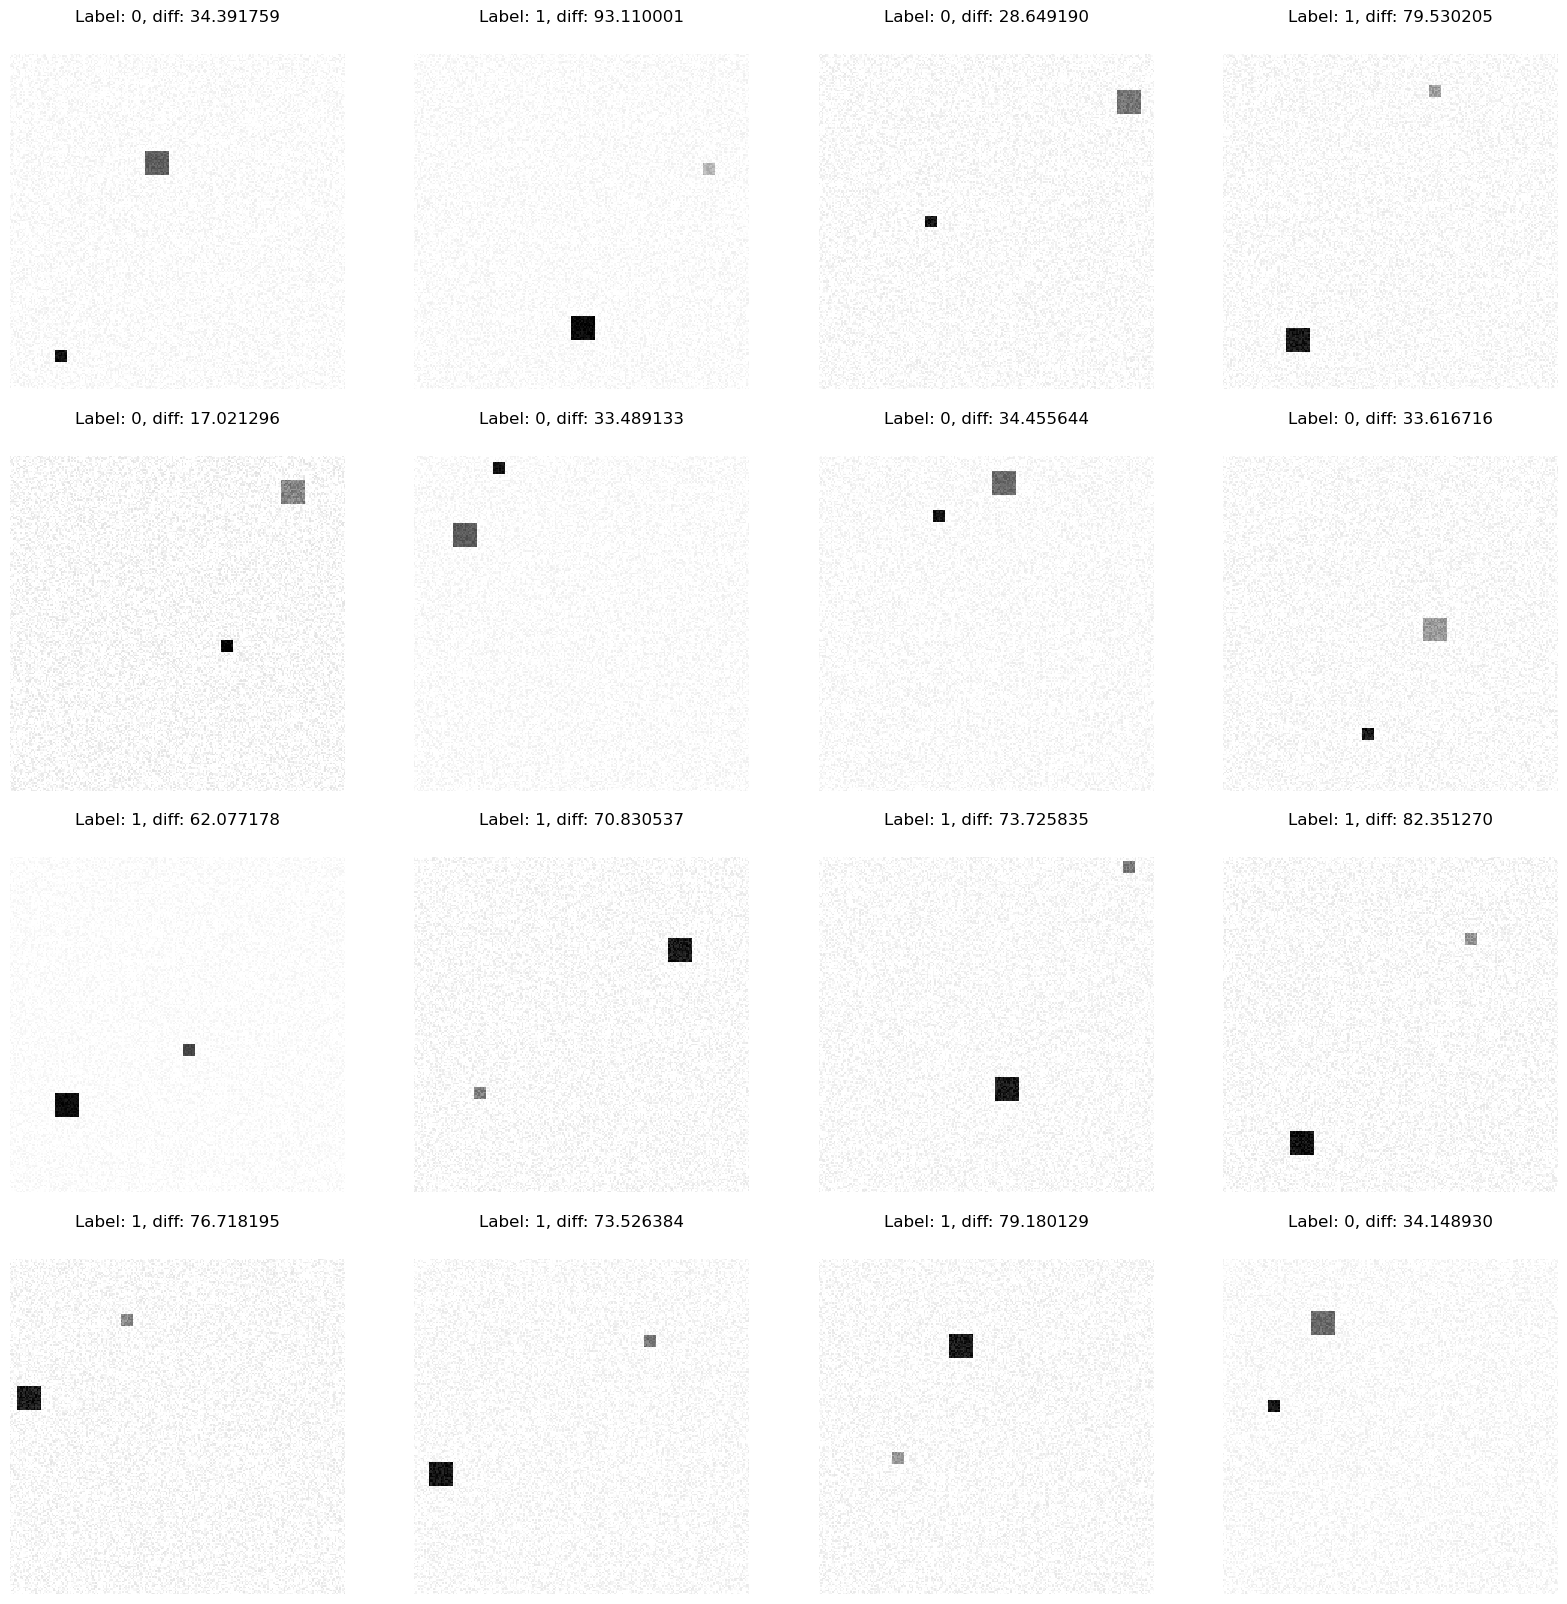

In [2]:

tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
plt.rcParams["figure.figsize"]=20,20

grid_x = 4
grid_y = 4 
shuffle = True
data_size = grid_x*grid_y
data_generate_size = 60

if not shuffle:
    perm_order = np.arange(data_size);
else:
    perm_order = np.random.permutation(data_size);

configfile = 'config_files/config_visualise.yml'
with open(configfile) as ymlfile:
    cgf = yaml.load(ymlfile, Loader=yaml.SafeLoader);

data_name = cgf['data_name'];
data_arguments = cgf['data_arguments'];

#data_arguments = {'number_of_samples': data_generate_size,
#                  'grid_size': 64,
#                  'side_length': 4,
#                  'shade_contrast': 0.5,}




data_loader = data_selector(data_name, data_arguments)
print(data_loader)
data_images, data_labels, data_diff = data_loader.load_data();
data_images = np.squeeze(data_images);
print(data_images.shape)
print(data_labels.shape)
plt.figure(); 
for i in range(data_size):
    idx = perm_order[i]
    
    plt.subplot(grid_y, grid_x, i+1)
    plt.matshow(data_images[idx], cmap='gray', fignum=False)
    plt.axis('off')
    plt.title('Label: {}, diff: {:f}'.format(int(data_labels[idx]), 100*float(data_diff[idx])));

plt.show()



# Visualise noiseless data

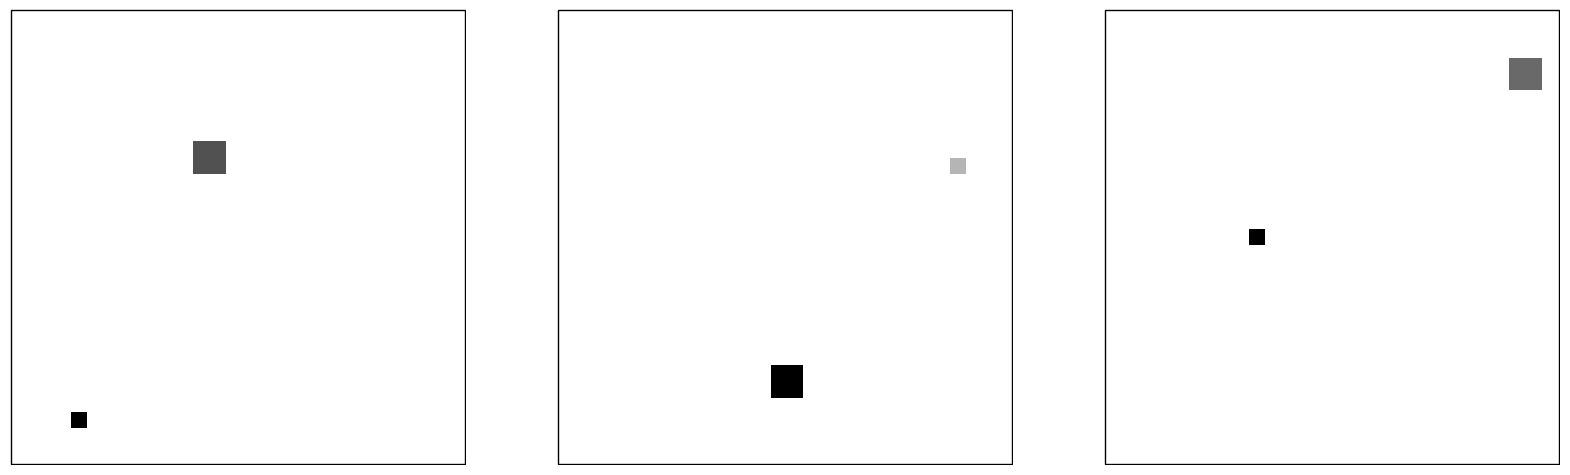

In [3]:
plt.rcParams["figure.figsize"]=20,20

data_name = cgf['data_name']
data_arguments = cgf['data_arguments']

grid_x = 3
grid_y = 1

data_images = np.load(data_arguments['images'] + 'noiseless'+ str(data_arguments['model']) + '.npy')
data_images = np.squeeze(data_images)
# plt.plot(grid_y, grid_x, i+1)
# plt.matshow(data_images[idx], cmap='gray', fignum=False)
# # put a black frame around the image
# plt.axis('off')
# plt.show()

plt.figure() 
for i in range(3):
    idx = perm_order[i]
    
    plt.subplot(grid_y, grid_x, i+1)
    plt.matshow(data_images[idx], cmap='gray', fignum=False)
    plt.axis('off')
    #plt.title('Label: {}, diff: {:f}'.format(int(data_labels[idx]), 100*float(data_diff[idx])))

    #Add black border around subplots
    plt.gca().add_artist(plt.Rectangle((0,0),223,223, fill=False, edgecolor='black', linewidth=1))

plt.show()



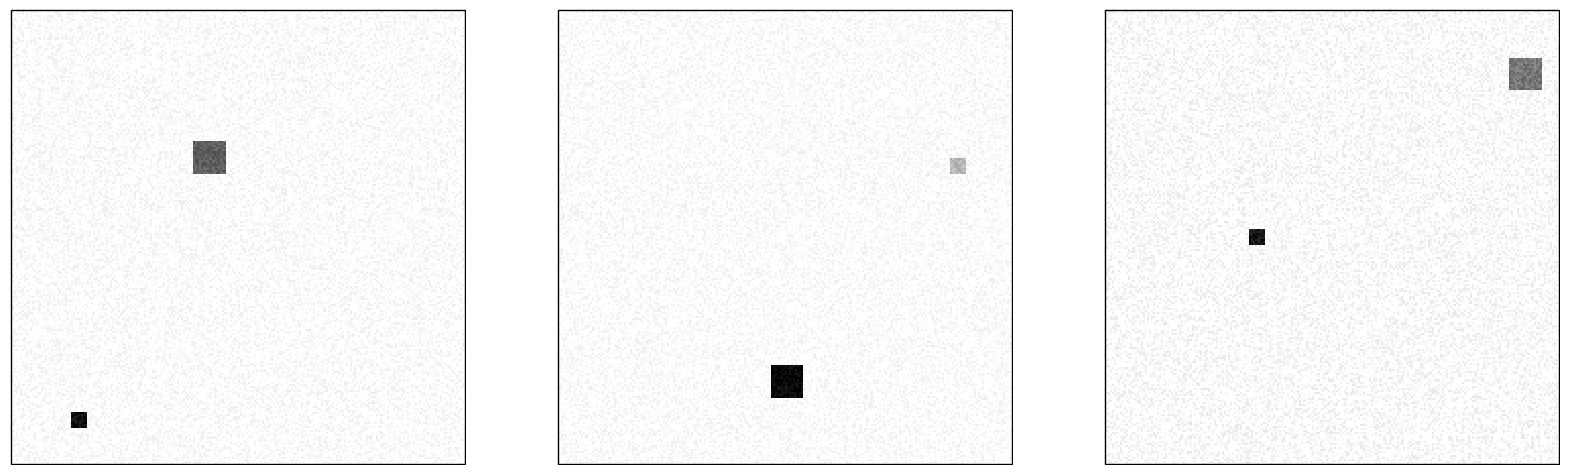

In [4]:
plt.rcParams["figure.figsize"]=20,20

data_name = cgf['data_name']
data_arguments = cgf['data_arguments']

grid_x = 3
grid_y = 1

data_images = np.load(data_arguments['images'] + str(data_arguments['model']) + '.npy')
data_images = np.squeeze(data_images)
# plt.plot(grid_y, grid_x, i+1)
# plt.matshow(data_images[idx], cmap='gray', fignum=False)
# # put a black frame around the image
# plt.axis('off')
# plt.show()

plt.figure() 
for i in range(3):
    idx = perm_order[i]
    
    plt.subplot(grid_y, grid_x, i+1)
    plt.matshow(data_images[idx], cmap='gray', fignum=False)
    plt.axis('off')
    #plt.title('Label: {}, diff: {:f}'.format(int(data_labels[idx]), 100*float(data_diff[idx])))

    #Add black border around subplots
    plt.gca().add_artist(plt.Rectangle((0,0),223,223, fill=False, edgecolor='black', linewidth=1))

plt.show()

